Attribute Information:

* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) smoothness (local variation in radius lengths)

d) compactness (perimeter^2 / area - 1.0)

e) symmetry



The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Class distribution: 357 benign, 212 malignant

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [ ]:
url = "https://raw.githubusercontent.com/gauravpurohit28/Breast-Cancer/main/data.csv"
dt = pd.read_csv(url)

In [ ]:
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Visualization

<Axes: >

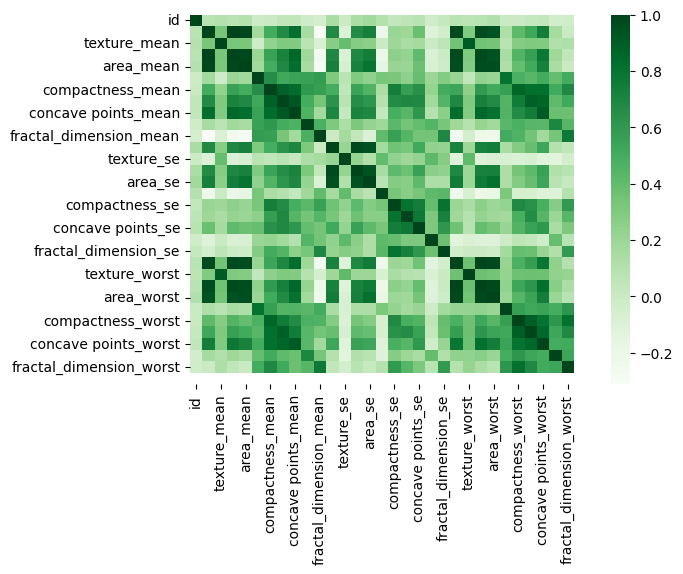

In [ ]:
corr = dt.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='Greens')

Data Drop

In [ ]:
dt1=dt.drop(['id','texture_se','area_se','area_mean','area_worst','fractal_dimension_se','fractal_dimension_worst','Unnamed: 32','concave points_worst','fractal_dimension_mean','concavity_mean','symmetry_worst','perimeter_mean','concave points_mean','concavity_se','symmetry_se','concave points_se','perimeter_se','compactness_worst','concavity_worst','smoothness_worst','perimeter_worst'],axis=1)
dt1.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,smoothness_se,compactness_se,radius_worst,texture_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.006399,0.04904,25.38,17.33
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.005225,0.01308,24.99,23.41
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.006150,0.04006,23.57,25.53
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.4956,0.009110,0.07458,14.91,26.50
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.011490,0.02461,22.54,16.67


In [ ]:
dt1.to_csv("New_csv")
dt2= pd.read_csv("New_csv")

In [ ]:
dt2.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,smoothness_se,compactness_se,radius_worst,texture_worst
0,0,M,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.006399,0.04904,25.38,17.33
1,1,M,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.005225,0.01308,24.99,23.41
2,2,M,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.006150,0.04006,23.57,25.53
3,3,M,11.42,20.38,0.14250,0.28390,0.2597,0.4956,0.009110,0.07458,14.91,26.50
4,4,M,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.011490,0.02461,22.54,16.67


In [ ]:
dt2=dt2.drop(['Unnamed: 0'], axis=1)

In [ ]:
dt2.shape

(569, 11)

In [ ]:
print(dt2)

    diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0           M        17.99         10.38          0.11840           0.27760   
1           M        20.57         17.77          0.08474           0.07864   
2           M        19.69         21.25          0.10960           0.15990   
3           M        11.42         20.38          0.14250           0.28390   
4           M        20.29         14.34          0.10030           0.13280   
..        ...          ...           ...              ...               ...   
564         M        21.56         22.39          0.11100           0.11590   
565         M        20.13         28.25          0.09780           0.10340   
566         M        16.60         28.08          0.08455           0.10230   
567         M        20.60         29.33          0.11780           0.27700   
568         B         7.76         24.54          0.05263           0.04362   

     symmetry_mean  radius_se  smoothness_se  compa

In [ ]:
dt2.tail()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,smoothness_se,compactness_se,radius_worst,texture_worst
564,M,21.56,22.39,0.11100,0.11590,0.1726,1.1760,0.010300,0.02891,25.450,26.40
565,M,20.13,28.25,0.09780,0.10340,0.1752,0.7655,0.005769,0.02423,23.690,38.25
566,M,16.60,28.08,0.08455,0.10230,0.1590,0.4564,0.005903,0.03731,18.980,34.12
567,M,20.60,29.33,0.11780,0.27700,0.2397,0.7260,0.006522,0.06158,25.740,39.42
568,B,7.76,24.54,0.05263,0.04362,0.1587,0.3857,0.007189,0.00466,9.456,30.37


In [ ]:
# getting some information about the data
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis         569 non-null    object 
 1   radius_mean       569 non-null    float64
 2   texture_mean      569 non-null    float64
 3   smoothness_mean   569 non-null    float64
 4   compactness_mean  569 non-null    float64
 5   symmetry_mean     569 non-null    float64
 6   radius_se         569 non-null    float64
 7   smoothness_se     569 non-null    float64
 8   compactness_se    569 non-null    float64
 9   radius_worst      569 non-null    float64
 10  texture_worst     569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [ ]:
# checking for missing values
dt2.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
smoothness_mean,0
compactness_mean,0
symmetry_mean,0
radius_se,0
smoothness_se,0
compactness_se,0
radius_worst,0


In [ ]:
# statistical measures about the data
dt2.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,smoothness_se,compactness_se,radius_worst,texture_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.181162,0.405172,0.007041,0.025478,16.269190,25.677223
std,3.524049,4.301036,0.014064,0.052813,0.027414,0.277313,0.003003,0.017908,4.833242,6.146258
min,6.981000,9.710000,0.052630,0.019380,0.106000,0.111500,0.001713,0.002252,7.930000,12.020000
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.232400,0.005169,0.013080,13.010000,21.080000
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.324200,0.006380,0.020450,14.970000,25.410000
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.478900,0.008146,0.032450,18.790000,29.720000
max,28.110000,39.280000,0.163400,0.345400,0.304000,2.873000,0.031130,0.135400,36.040000,49.540000


In [ ]:
# checking the distribution of Target Varibale
dt2['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


1 --> Malignant

0 --> Benign

In [ ]:
dt2.groupby('diagnosis').mean()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,smoothness_se,compactness_se,radius_worst,texture_worst
diagnosis,,,,,,,,,,
B,12.146524,17.914762,0.092478,0.080085,0.174186,0.284082,0.007196,0.021438,13.379801,23.515070
M,17.462830,21.604906,0.102898,0.145188,0.192909,0.609083,0.006780,0.032281,21.134811,29.318208


Separating the features and target

In [ ]:
X = dt2.drop(columns='diagnosis', axis=1)
Y = dt2['diagnosis']

In [ ]:
print(X)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     symmetry_mean  radius_se  smoothness_se  compactness_se  radius_worst  \
0           0.2419     1.0950       0.006399         0.04904        25.380   
1           0.1

In [ ]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Splitting the data into training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 10) (455, 10) (114, 10)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model using Training data

model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9428571428571428


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9298245614035088


Building a Predictive System

In [ ]:
model.predict([[12.146524,17.914762,0.092478,0.080085,0.025717,0.284082,13.379801,0.124959,0.182673,0.166238]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)

In [ ]:
input_data = (13.54,14.36,23.56,0.008462,0.01315,0.0198,15.11,99.7,0.1773,0.23)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 'M'):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



['B']
The Breast Cancer is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
